In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = "/Users/preci/Documents/inf 791/Assignment4/Datasetmerged_file.xlsx"
df = pd.read_excel(data)
df.head()  


Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3  01:06:00      Sunday              18-30          Male  Junior high school   
4  01:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                     NaN  ...   Going straight   
3     Governmental                     NaN  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4               NaN                  NaN    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 32 columns]

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/Users/preci/Documents/inf 791/Assignment4/Datasetmerged_file.xlsx"
data = pd.read_excel(file_path)

data.head()


Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3  01:06:00      Sunday              18-30          Male  Junior high school   
4  01:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                     NaN  ...   Going straight   
3     Governmental                     NaN  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4               NaN                  NaN    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 32 columns]

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Handle missing data (e.g., fill or drop)
data.fillna(method='ffill', inplace=True)  # Example: forward fill for missing values

# Check for inconsistencies (e.g., data types, unique values)
print(data.dtypes)


Time                              1
Sex_of_driver                     1
Educational_level               742
Vehicle_driver_relation         580
Driving_experience              830
Type_of_vehicle                 951
Owner_of_vehicle                483
Service_year_of_vehicle        3929
Defect_of_vehicle              4428
Area_accident_occured           240
Lanes_or_Medians                386
Road_allignment                 143
Types_of_Junction               888
Road_surface_type               173
Road_surface_conditions           1
Light_conditions                  1
Weather_conditions                1
Type_of_collision               156
Number_of_vehicles_involved       1
Number_of_casualties              1
Vehicle_movement                309
Casualty_class                    1
Sex_of_casualty                   1
Age_band_of_casualty              1
Casualty_severity                 1
Work_of_casuality              3199
Fitness_of_casuality           2636
Pedestrian_movement         

/var/folders/7v/xgd2w_v544968m_m7h1tj28m0000gn/T/ipykernel_29366/2941988301.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Example: forward fill for missing values


In [8]:
for column in data.columns:
    if data[column].dtype == 'object':
        # Fill missing values for categorical columns with the mode
        data[column] = data[column].fillna(data[column].mode()[0])
    else:
        # Fill missing values for numerical columns with the median
        data[column] = data[column].fillna(data[column].median())

# Display the DataFrame after handling missing data
print("DataFrame after handling missing values:")
print(data.head())


DataFrame after handling missing values:
       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3  01:06:00      Sunday              18-30          Male  Junior high school   
4  01:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr  Public (> 45 seats)   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movemen

<Axes: >

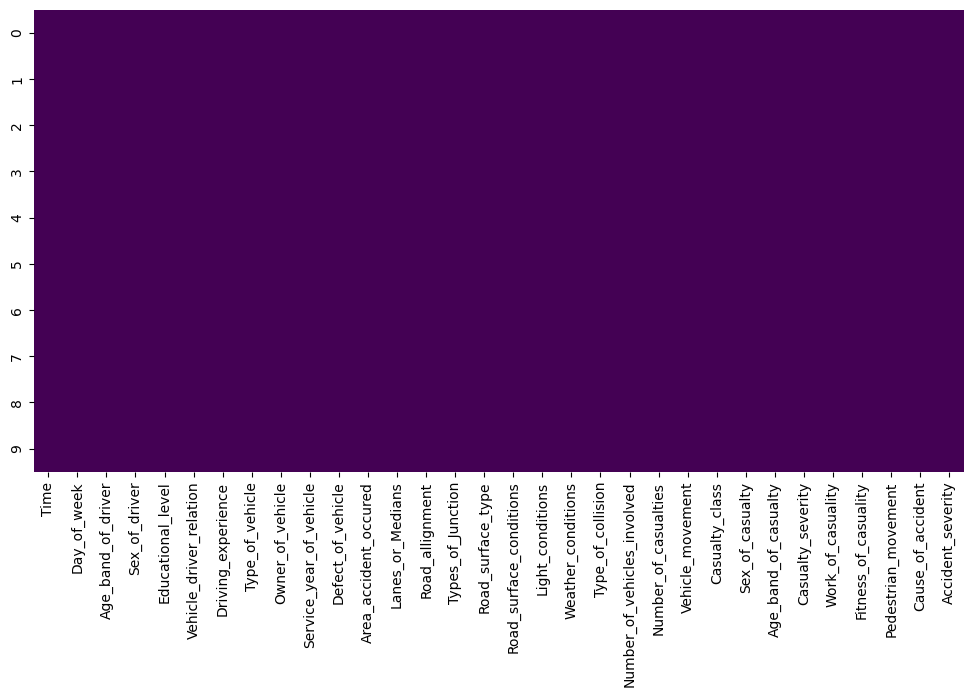

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))  # Adjust the size as needed

# Render the DataFrame as a table
sns.heatmap(data.head(10).isnull(), cbar=False, cmap='viridis') # Replace with data


In [10]:
# Convert categorical variables to numeric using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Verify changes
data.head()


Number_of_vehicles_involved  Number_of_casualties  Time_00:02:00  \
0                          2.0                   2.0          False   
1                          2.0                   2.0          False   
2                          2.0                   2.0          False   
3                          2.0                   2.0          False   
4                          2.0                   2.0          False   

   Time_00:03:00  Time_00:04:00  Time_00:06:00  Time_00:08:00  Time_00:09:00  \
0          False          False          False          False          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3          False          False          False          False          False   
4          False          False          False          False          False   

   Time_00:10:00  Time_00:11:00  ...  \
0          False          False  ...   
1          False          False  ...   
2          False          False  ...   
3          False          False  ...   
4          False          False  ...   

   Cause_of_accident_No priority to vehicle  Cause_of_accident_Other  \
0                                     False                    False   
1                                     False                    False   
2                                     False                    False   
3                                     False                    False   
4                                     False                    False   

   Cause_of_accident_Overloading  Cause_of_accident_Overspeed  \
0                          False                        False   
1                          False                        False   
2                          False                        False   
3                          False                        False   
4                          False                        False   

   Cause_of_accident_Overtaking  Cause_of_accident_Overturning  \
0                         False                          False   
1                          True                          False   
2                         False                          False   
3                         False                          False   
4                          True                          False   

   Cause_of_accident_Turnover  Cause_of_accident_Unknown  \
0                       False                      False   
1                       False                      False   
2                       False                      False   
3                       False                      False   
4                       False                      False   

   Accident_severity_Serious Injury  Accident_severity_Slight Injury  
0                             False                             True  
1                             False                             True  
2                              True                            False  
3                             False                             True  
4                             False                             True  

[5 rows x 1255 columns]

In [11]:
data = pd.get_dummies(data, drop_first=True).astype(int)


In [12]:
data.head()


Number_of_vehicles_involved  Number_of_casualties  Time_00:02:00  \
0                            2                     2              0   
1                            2                     2              0   
2                            2                     2              0   
3                            2                     2              0   
4                            2                     2              0   

   Time_00:03:00  Time_00:04:00  Time_00:06:00  Time_00:08:00  Time_00:09:00  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   Time_00:10:00  Time_00:11:00  ...  \
0              0              0  ...   
1              0              0  ...   
2              0              0  ...   
3              0              0  ...   
4              0              0  ...   

   Cause_of_accident_No priority to vehicle  Cause_of_accident_Other  \
0                                         0                        0   
1                                         0                        0   
2                                         0                        0   
3                                         0                        0   
4                                         0                        0   

   Cause_of_accident_Overloading  Cause_of_accident_Overspeed  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   

   Cause_of_accident_Overtaking  Cause_of_accident_Overturning  \
0                             0                              0   
1                             1                              0   
2                             0                              0   
3                             0                              0   
4                             1                              0   

   Cause_of_accident_Turnover  Cause_of_accident_Unknown  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   Accident_severity_Serious Injury  Accident_severity_Slight Injury  
0                                 0                                1  
1                                 0                                1  
2                                 1                                0  
3                                 0                                1  
4                                 0                                1  

[5 rows x 1255 columns]

In [13]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()

# Scale numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [14]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling
numerical_cols = ['Number_of_vehicles_involved', 'Number_of_casualties']  # add other numerical columns if any

# Initialize the scaler
scaler = StandardScaler()

data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print("Data after scaling numerical features:")
print(data[numerical_cols].head())


Data after scaling numerical features:
   Number_of_vehicles_involved  Number_of_casualties
0                    -0.059058              0.448706
1                    -0.059058              0.448706
2                    -0.059058              0.448706
3                    -0.059058              0.448706
4                    -0.059058              0.448706


In [16]:
print(data.columns)


Index(['Number_of_vehicles_involved', 'Number_of_casualties', 'Time_00:02:00',
       'Time_00:03:00', 'Time_00:04:00', 'Time_00:06:00', 'Time_00:08:00',
       'Time_00:09:00', 'Time_00:10:00', 'Time_00:11:00',
       ...
       'Cause_of_accident_No priority to vehicle', 'Cause_of_accident_Other',
       'Cause_of_accident_Overloading', 'Cause_of_accident_Overspeed',
       'Cause_of_accident_Overtaking', 'Cause_of_accident_Overturning',
       'Cause_of_accident_Turnover', 'Cause_of_accident_Unknown',
       'Accident_severity_Serious Injury', 'Accident_severity_Slight Injury'],
      dtype='object', length=1255)


In [18]:
scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("\nProcessed DataFrame after scaling numerical features:")
print(data.head())



Processed DataFrame after scaling numerical features:
   Number_of_vehicles_involved  Number_of_casualties  Time_00:02:00  \
0                    -0.059058              0.448706      -0.012744   
1                    -0.059058              0.448706      -0.012744   
2                    -0.059058              0.448706      -0.012744   
3                    -0.059058              0.448706      -0.012744   
4                    -0.059058              0.448706      -0.012744   

   Time_00:03:00  Time_00:04:00  Time_00:06:00  Time_00:08:00  Time_00:09:00  \
0      -0.012744      -0.009011      -0.012744      -0.015608      -0.025494   
1      -0.012744      -0.009011      -0.012744      -0.015608      -0.025494   
2      -0.012744      -0.009011      -0.012744      -0.015608      -0.025494   
3      -0.012744      -0.009011      -0.012744      -0.015608      -0.025494   
4      -0.012744      -0.009011      -0.012744      -0.015608      -0.025494   

   Time_00:10:00  Time_00:11:00  ... 

In [ ]:
import pandas as pd

# Assuming 'data' is your processed DataFrame after scaling
output_path = "/Users/preci/Documents/inf 791/Assignment4/New dataset.xlsx"

# Save the DataFrame to an Excel file
data.to_excel(output_path, index=False)

print(f"Data saved to {output_path}")


In [ ]:
output_csv_path = '/Users/preci/Documents/inf 791/Assignment4/New dataset.csv'
data_encoded.to_csv(output_csv_path, index=False)
print(f"\nProcessed data saved to {output_csv_path}.")

In [ ]:
output_csv_path = '/Users/preci/Documents/inf 791/Assignment4/New dataset.csv'
data.to_csv(output_csv_path, index=False)
print(f"\nProcessed data saved to {output_csv_path}.")

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_excel("/Users/preci/Documents/inf 791/Assignment4/Datasetmerged_file.xlsx")

# Step 4: Scale Numerical Features
scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Apply scaling only to numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("\nProcessed DataFrame after scaling numerical features:")
print(data.head())

# Save the processed DataFrame to a new Excel file
output_path = "/Users/preci/Documents/inf 791/Assignment4/New dataset/scaled_data.xlsx"
data.to_excel(output_path, index=False)




Processed DataFrame after scaling numerical features:
       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3  01:06:00      Sunday              18-30          Male  Junior high school   
4  01:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... V

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os

# Load the dataset
data = pd.read_excel("/Users/preci/Documents/inf 791/Assignment4/Datasetmerged_file.xlsx")

# Step 4: Scale Numerical Features
scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Apply scaling only to numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("\nProcessed DataFrame after scaling numerical features:")
print(data.head())

# Save the processed DataFrame to a new Excel file
output_path = "/Users/preci/Documents/inf 791/Assignment4/New dataset/scaled_data.xlsx"
os.makedirs(os.path.dirname(output_path), exist_ok=True)  # Create directory if it doesn't exist
data.to_excel(output_path, index=False)

# Load the processed dataset from the newly saved file
df_encoded = pd.read_excel(output_path)

# Check the columns in the DataFrame
print("\nColumns in the processed DataFrame:")
print(df_encoded.columns)

# Check if target columns exist in the DataFrame
target_columns = ['Accident_severity_Serious Injury', 'Accident_severity_Slight Injury']
missing_columns = [col for col in target_columns if col not in df_encoded.columns]

if missing_columns:
    print(f"\nWarning: The following target columns are missing: {missing_columns}")
else:
    # Define features and target variable
    X = df_encoded.drop(columns=target_columns)  # Drop target columns
    y = df_encoded['Accident_severity_Serious Injury']  # Choose one as the target variable

    # Display the shapes of X and y
    print(f"Features shape: {X.shape}, Target shape: {y.shape}")



Processed DataFrame after scaling numerical features:
       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3  01:06:00      Sunday              18-30          Male  Junior high school   
4  01:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... V

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os

# Load the dataset
data = pd.read_excel("/Users/preci/Documents/inf 791/Assignment4/Datasetmerged_file.xlsx")

# Step 4: Scale Numerical Features
scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Apply scaling only to numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("\nProcessed DataFrame after scaling numerical features:")
print(data.head())

# Save the processed DataFrame to a new Excel file
output_path = "/Users/preci/Documents/inf 791/Assignment4/New dataset/scaled_data.xlsx"
os.makedirs(os.path.dirname(output_path), exist_ok=True)  # Create directory if it doesn't exist
data.to_excel(output_path, index=False)

# Load the processed DataFrame from the newly saved file
df_encoded = pd.read_excel(output_path)

# Check the columns in the DataFrame
print("\nColumns in the processed DataFrame:")
print(df_encoded.columns)

# Define features and target variable
X = df_encoded.drop(columns=['Accident_severity'])  # Drop the target column
y = df_encoded['Accident_severity']  # Use the existing target column

# Display the shapes of X and y
print(f"Features shape: {X.shape}, Target shape: {y.shape}")



Processed DataFrame after scaling numerical features:
       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3  01:06:00      Sunday              18-30          Male  Junior high school   
4  01:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... V

In [10]:
import pandas as pd

# Load your dataset
data = pd.read_excel('/Users/preci/Documents/inf 791/Assignment4/Datasetmerged_file.xlsx')

# Print the column names
print(data.columns)


Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')


In [11]:
X = data.drop('Casualty_severity', axis=1)
y = data['Casualty_severity']


In [5]:
import pandas as pd

# Load your processed dataset
data = pd.read_excel('/Users/preci/Documents/inf 791/Assignment4/New dataset/scaled_data.xlsx')

# Convert 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'], errors='coerce')

# Extract hour and minute from 'Time' column
data['Hour'] = data['Time'].dt.hour
data['Minute'] = data['Time'].dt.minute

# Drop the original 'Time' column
data = data.drop(columns=['Time'])

# Save the processed dataset if needed
data.to_excel('/Users/preci/Documents/inf 791/Assignment4/New dataset/processed_data.xlsx', index=False)

# Display the updated dataset
print(data.head())


  Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0      Monday              18-30          Male   Above high school   
1      Monday              31-50          Male  Junior high school   
2      Monday              18-30          Male  Junior high school   
3      Sunday              18-30          Male  Junior high school   
4      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle Defect_of_vehicle  ...  \
0            Owner              Above 10yr         No defect  ...   
1            Owner        

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_excel('/Users/preci/Documents/inf 791/Assignment4/New dataset/processed_data.xlsx')

# Print column names to identify the target variable and features
print(data.columns)

# Replace 'Casualty_severity' with the actual name of your target variable
X = data.drop('Casualty_severity', axis=1)  # Use your actual target column name
y = data['Casualty_severity']  # Use your actual target column name

# Convert datetime columns to numerical features if any
if 'Time' in X.columns:
    # Assuming 'Time' is a datetime.time object
    X['Hour'] = X['Time'].apply(lambda x: x.hour if pd.notnull(x) else None)
    X['Minute'] = X['Time'].apply(lambda x: x.minute if pd.notnull(x) else None)
    X.drop('Time', axis=1, inplace=True)  # Drop the original column

# Encode categorical variables to numeric
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))

# Handle NaN values by dropping rows with any NaN values
X.dropna(inplace=True)
y = y[X.index]  # Align y with the cleaned X

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions and evaluate
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
lr_model.fit(X_train, y_train)

# Make predictions and evaluate
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'Hour', 'Minute'],
      dtype='object')
Decision Tree Accuracy: 0.87
Logistic Regression Accuracy: 0.94


In [7]:
import lime
from lime.lime_tabular import LimeTabularExplainer

# Initialize the LIME explainer
explainer = LimeTabularExplainer(
    X_train.values, 
    feature_names=X_train.columns, 
    class_names=['Casualty_severity'], 
    mode='classification'
)

# Explain an instance (you can choose any instance from X_test)
i = 0  # Choose a specific index from X_test
exp = explainer.explain_instance(X_test.values[i], dt_model.predict_proba)
exp.show_in_notebook(show_table=True)
exp.save_to_file('/Users/preci/Documents/inf 791/Assignment4/LIME_explanation.html')


<Figure size 640x480 with 0 Axes>

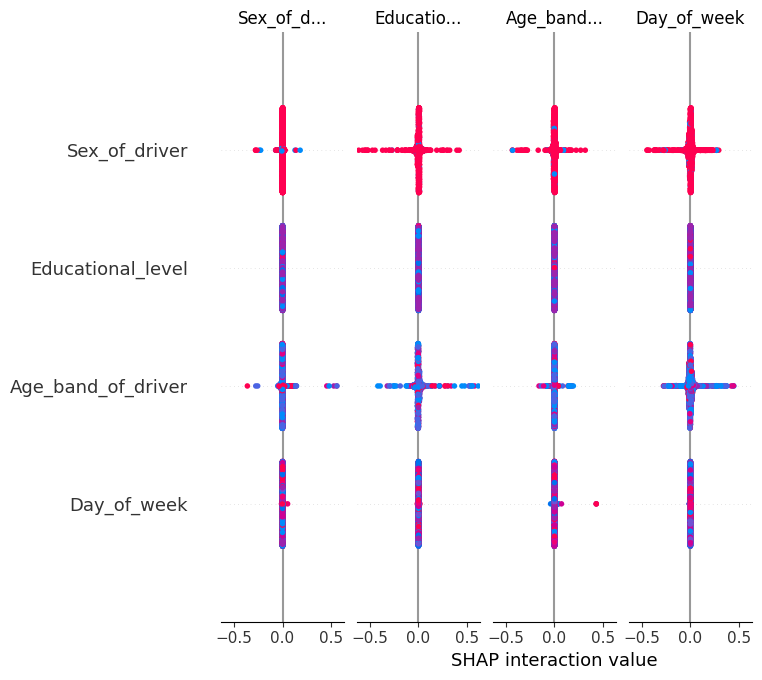

<Figure size 640x480 with 0 Axes>

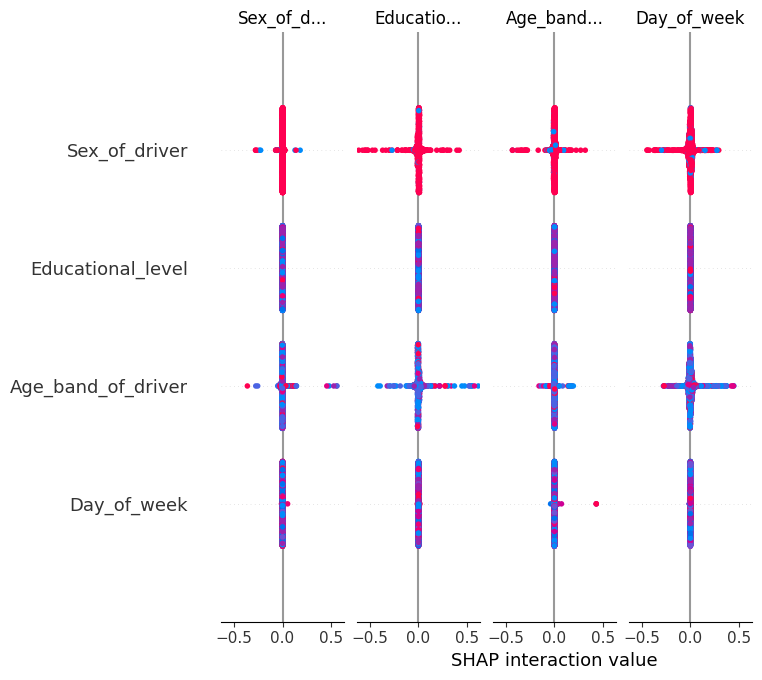

In [11]:
# Replace '/path/to/save/' with your actual directory path
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.savefig("/Users/preci/Documents/inf 791/Assignment4/visualizations/shap_summary_plot.png", bbox_inches="tight")

# A detailed summary plot to show the distribution of SHAP values for each feature
plt.figure()
shap.summary_plot(shap_values, X_test, show=False)
plt.savefig("/Users/preci/Documents/inf 791/Assignment4/visualizations/shap_detailed_summary.png", bbox_inches="tight")


In [15]:
print("X_test shape:", X_test.shape)
print("X_test columns:", X_test.columns.tolist())


X_test shape: (2464, 32)
X_test columns: ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity', 'Hour', 'Minute']


Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'Hour', 'Minute'],
      dtype='object')
Decision Tree Accuracy: 0.87
Logistic Regression Accuracy: 0.94


<Figure size 640x480 with 0 Axes>

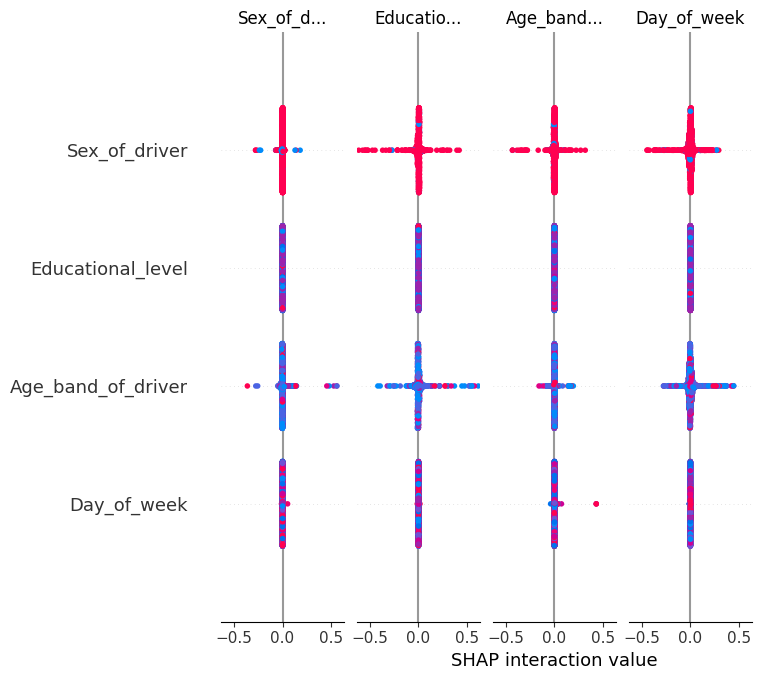

<Figure size 640x480 with 0 Axes>

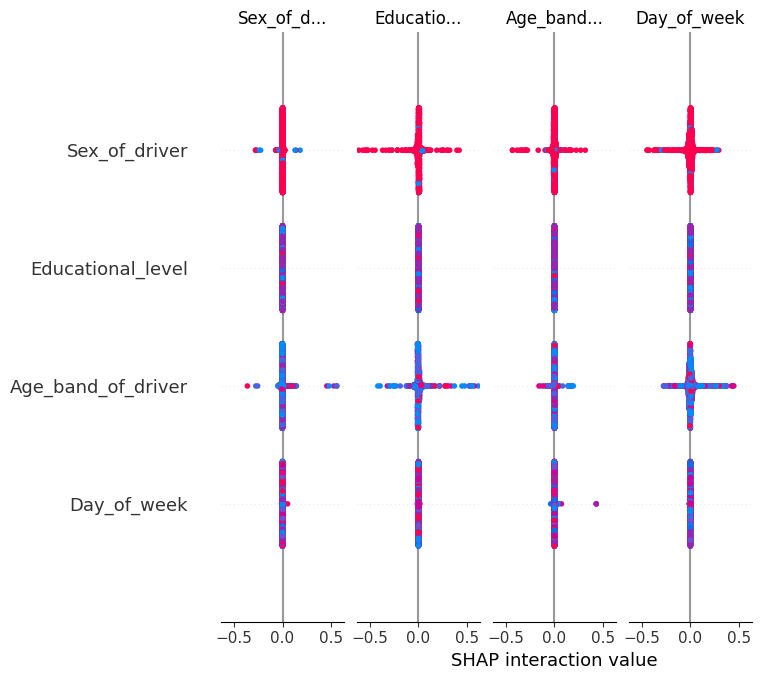

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_excel('/Users/preci/Documents/inf 791/Assignment4/New dataset/processed_data.xlsx')

# Print column names to identify the target variable and features
print(data.columns)

# Replace 'Casualty_severity' with the actual name of your target variable
X = data.drop('Casualty_severity', axis=1)  # Use your actual target column name
y = data['Casualty_severity']  # Use your actual target column name

# Convert datetime columns to numerical features if any
if 'Time' in X.columns:
    X['Hour'] = X['Time'].apply(lambda x: x.hour if pd.notnull(x) else None)
    X['Minute'] = X['Time'].apply(lambda x: x.minute if pd.notnull(x) else None)
    X.drop('Time', axis=1, inplace=True)

# Encode categorical variables to numeric
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))

# Handle NaN values
X.dropna(inplace=True)
y = y[X.index]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# SHAP analysis
explainer = shap.TreeExplainer(dt_model)  # Use TreeExplainer for Decision Trees
shap_values = explainer.shap_values(X_test)

# Save summary plots
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.savefig("/Users/preci/Documents/inf 791/Assignment4/visualizations/shap_summary_plot.png", bbox_inches="tight")

plt.figure()
shap.summary_plot(shap_values, X_test, show=False)
plt.savefig("/Users/preci/Documents/inf 791/Assignment4/visualizations/shap_detailed_summary.png", bbox_inches="tight")

# Make predictions and evaluate
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")


In [24]:
print(data.columns)


Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'Hour', 'Minute'],
      dtype='object')


In [25]:
# Load your dataset
data = pd.read_excel('/Users/preci/Documents/inf 791/Assignment4/New dataset/processed_data.xlsx')

# Check the columns in the DataFrame
print("Available columns in the dataset:")
print(data.columns)


Available columns in the dataset:
Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'Hour', 'Minute'],
      dtype='object')


Decision Tree Accuracy: 0.78
Logistic Regression Accuracy: 0.85


<Figure size 1200x800 with 0 Axes>

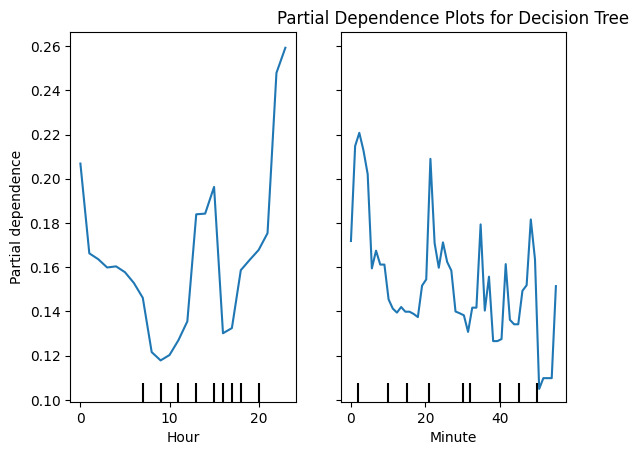

<Figure size 1200x800 with 0 Axes>

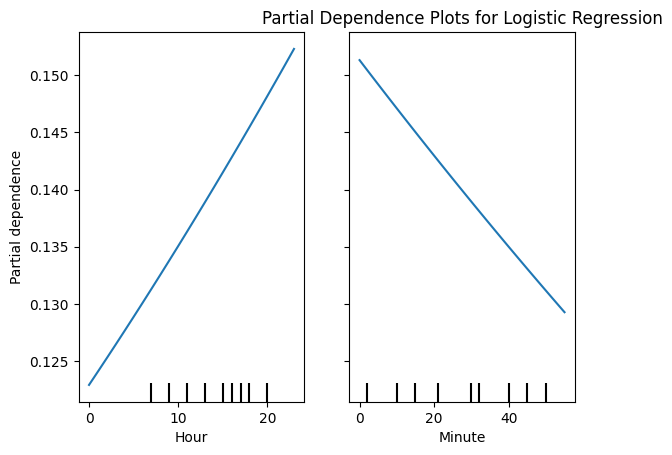

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_excel('/Users/preci/Documents/inf 791/Assignment4/New dataset/processed_data.xlsx')

# Create a binary target variable indicating severity (1 for Serious Injury, 0 for Slight Injury)
y = data['Accident_severity'].apply(lambda x: 1 if x == 'Serious Injury' else 0)

# Drop the target column from the features
X = data.drop(columns=['Accident_severity'])

# Encode categorical variables to numeric
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))

# Handle NaN values by dropping rows with any NaN values
X.dropna(inplace=True)
y = y[X.index]  # Align y with the cleaned X

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions and evaluate
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)  # Increased max_iter to ensure convergence
lr_model.fit(X_train, y_train)

# Make predictions and evaluate
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")

# Create Partial Dependence Plots for Decision Tree model
plt.figure(figsize=(12, 8))
features = ['Hour', 'Minute']  # List of features to create PDP for
PartialDependenceDisplay.from_estimator(dt_model, X_train, features, grid_resolution=50)
plt.title('Partial Dependence Plots for Decision Tree')
plt.savefig('/Users/preci/Documents/inf 791/Assignment4/visualizations/pdp_decision_tree.png', bbox_inches='tight')
plt.show()

# Create Partial Dependence Plots for Logistic Regression model
plt.figure(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(lr_model, X_train, features, grid_resolution=50)
plt.title('Partial Dependence Plots for Logistic Regression')
plt.savefig('/Users/preci/Documents/inf 791/Assignment4/visualizations/pdp_logistic_regression.png', bbox_inches='tight')
plt.show()


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from lime import lime_tabular
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_excel('/Users/preci/Documents/inf 791/Assignment4/New dataset/processed_data.xlsx')

# Create a binary target variable indicating severity (1 for Serious Injury, 0 for Slight Injury)
y = data['Accident_severity'].apply(lambda x: 1 if x == 'Serious Injury' else 0)

# Drop the target column from the features
X = data.drop(columns=['Accident_severity'])

# Encode categorical variables to numeric
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))

# Handle NaN values by dropping rows with any NaN values
X.dropna(inplace=True)
y = y[X.index]  # Align y with the cleaned X

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Initialize LIME explainer for tabular data
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['Slight Injury', 'Serious Injury'],
    mode='classification'
)

# Choose an instance from the test set for explanation (for example, the first instance)
instance_index = 0  # You can change this index to any instance you want to explain
instance = X_test.iloc[instance_index]

# Get prediction probabilities
predictions = dt_model.predict_proba([instance])[0]

# Generate LIME explanation for the Decision Tree model
lime_exp_dt = explainer.explain_instance(
    data_row=instance,
    predict_fn=dt_model.predict_proba
)

# Generate LIME explanation for the Logistic Regression model
lime_exp_lr = explainer.explain_instance(
    data_row=instance,
    predict_fn=lr_model.predict_proba
)

# Visualize the explanations
# LIME explanation for Decision Tree
lime_exp_dt.show_in_notebook(show_table=True, show_all=False)
plt.savefig('/Users/preci/Documents/inf 791/Assignment4/visualizations/lime_decision_tree.png', bbox_inches='tight')

# LIME explanation for Logistic Regression
lime_exp_lr.show_in_notebook(show_table=True, show_all=False)
plt.savefig('/Users/preci/Documents/inf 791/Assignment4/visualizations/lime_logistic_regression.png', bbox_inches='tight')


<Figure size 640x480 with 0 Axes>